In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
from textblob import TextBlob
from langdetect import detect
import warnings
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lucaschambeck/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lucaschambeck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
file_path = '/Users/lucaschambeck/Library/CloudStorage/OneDrive-ZHAW/Studium/Semester 4/PM4/PM4_Lyrics/data/reduced/lyrics_minimal.csv'
df = pd.read_csv(file_path)
print(f"Datensatz geladen: {df.shape[0]} Zeilen und {df.shape[1]} Spalten")

english_df = df[df['language'] == 'en'].copy()
print(f"Englische Texte: {english_df.shape[0]}")

Datensatz geladen: 500 Zeilen und 11 Spalten
Englische Texte: 100


In [4]:
def clean_text(text):
    if pd.isna(text):
        return ""
    return re.sub(r'[^\w\s]', '', str(text).lower())

english_df['cleaned_lyrics'] = english_df['lyrics'].apply(clean_text)


In [5]:
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Prüfe, ob die Daten bereits heruntergeladen wurden
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    # Lege ein spezifisches Verzeichnis für NLTK-Daten fest
    nltk_data_dir = os.path.expanduser('~/nltk_data')
    os.makedirs(nltk_data_dir, exist_ok=True)
    
    # Lade die Daten in das spezifische Verzeichnis
    nltk.download('punkt', download_dir=nltk_data_dir)
    nltk.download('stopwords', download_dir=nltk_data_dir)

# Stelle sicher, dass NLTK weiß, wo es nach den Daten suchen soll
nltk.data.path.append(os.path.expanduser('~/nltk_data'))

# Definiere die Tokenisierungsfunktion
def tokenize_text(text):
    if pd.isna(text):
        return []
    
    # Stopwörter laden
    try:
        stop_words = set(stopwords.words('english'))
    except LookupError:
        # Fallback, falls stopwords nicht geladen werden können
        stop_words = set()
        print("Warnung: Stopwörter konnten nicht geladen werden.")
    
    # Tokenisieren und bereinigen
    try:
        tokens = word_tokenize(str(text).lower())
    except LookupError:
        # Fallback, falls tokenizer nicht geladen werden kann
        tokens = str(text).lower().split()
        print("Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.")
    
    # Entfernen von Sonderzeichen und Stopwörtern
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 2]
    return tokens

# Tokenisierung anwenden
english_df['tokens'] = english_df['cleaned_lyrics'].apply(tokenize_text)

Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende einfache Tokensierung.
Warnung: Punkt tokenizer nicht gefunden, verwende e

In [6]:
sample_size = 1000
english_sample = english_df.sample(min(sample_size, len(english_df)), random_state=42)
print("Datenaufbereitung abgeschlossen.")

Datenaufbereitung abgeschlossen.


In [7]:
def compute_tfidf(texts, max_features=1000):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    return tfidf_matrix, tfidf_vectorizer

small_sample = english_sample.head(100)
tfidf_matrix, tfidf_vectorizer = compute_tfidf(small_sample['cleaned_lyrics'])
print(f"TF-IDF Matrix erstellt mit Form: {tfidf_matrix.shape}")


TF-IDF Matrix erstellt mit Form: (100, 1000)


In [10]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

euclidean_dist_matrix = euclidean_distances(tfidf_matrix)
manhattan_dist_matrix = manhattan_distances(tfidf_matrix)
cosine_sim_matrix = cosine_similarity(tfidf_matrix)
cosine_dist_matrix = 1 - cosine_sim_matrix


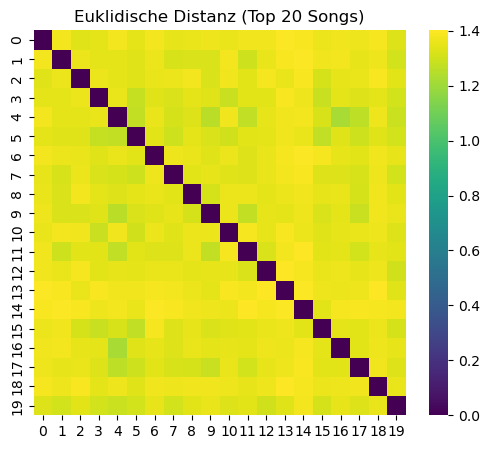

In [11]:
# Euklidisch
plt.figure(figsize=(6, 5))
sns.heatmap(euclidean_dist_matrix[:20, :20], cmap='viridis')
plt.title('Euklidische Distanz (Top 20 Songs)')
plt.show()


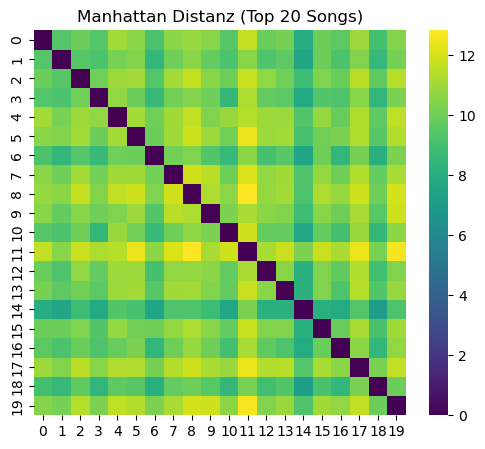

In [12]:
# Manhattan
plt.figure(figsize=(6, 5))
sns.heatmap(manhattan_dist_matrix[:20, :20], cmap='viridis')
plt.title('Manhattan Distanz (Top 20 Songs)')
plt.show()

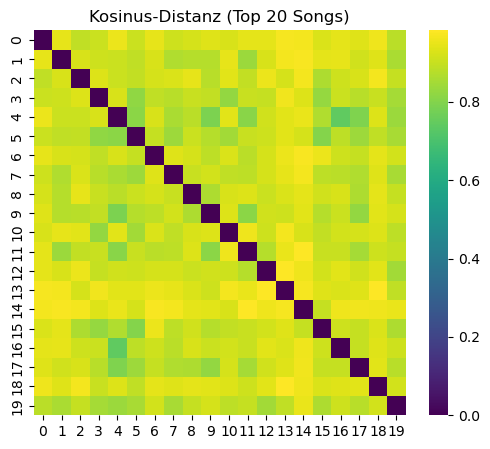

In [13]:
# Kosinus
plt.figure(figsize=(6, 5))
sns.heatmap(cosine_dist_matrix[:20, :20], cmap='viridis')
plt.title('Kosinus-Distanz (Top 20 Songs)')
plt.show()

In [14]:
sentences = [tokens for tokens in english_sample['tokens'] if len(tokens) > 0]
word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4, sg=1)
print(f"Word2Vec Modell trainiert mit {len(word2vec_model.wv.key_to_index)} Wörtern.")


Word2Vec Modell trainiert mit 199 Wörtern.


In [15]:
example_words = ['love', 'heart', 'money', 'night', 'pain', 'happy', 'sad']
for word in example_words:
    try:
        similar = word2vec_model.wv.most_similar(word, topn=10)
        print(f"\nÄhnliche Wörter zu '{word}':")
        for w, sim in similar:
            print(f"  {w}: {sim:.4f}")
    except KeyError:
        print(f"'{word}' nicht im Vokabular.")



Ähnliche Wörter zu 'love':
  shit: 0.9974
  verse: 0.9970
  back: 0.9968
  know: 0.9967
  niggas: 0.9965
  get: 0.9965
  right: 0.9964
  hard: 0.9964
  bitch: 0.9964
  like: 0.9963

Ähnliche Wörter zu 'heart':
  one: 0.9964
  verse: 0.9964
  like: 0.9963
  see: 0.9962
  get: 0.9961
  nigga: 0.9960
  shit: 0.9960
  take: 0.9960
  got: 0.9960
  mean: 0.9959

Ähnliche Wörter zu 'money':
  niggas: 0.9972
  get: 0.9971
  know: 0.9970
  dont: 0.9970
  ass: 0.9969
  shit: 0.9967
  hard: 0.9967
  cant: 0.9967
  verse: 0.9967
  nigga: 0.9966

Ähnliche Wörter zu 'night':
  know: 0.9950
  every: 0.9950
  back: 0.9950
  shit: 0.9949
  verse: 0.9949
  get: 0.9948
  real: 0.9948
  ass: 0.9947
  niggas: 0.9946
  hard: 0.9946
'pain' nicht im Vokabular.
'happy' nicht im Vokabular.
'sad' nicht im Vokabular.


In [16]:
def get_song_vector(tokens, model, vector_size=100):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        try:
            vec += model.wv[word]
            count += 1
        except KeyError:
            continue
    return vec / count if count > 0 else vec

song_vectors = []
valid_indices = []

for i, tokens in enumerate(english_sample['tokens']):
    vec = get_song_vector(tokens, word2vec_model)
    if np.any(vec):
        song_vectors.append(vec)
        valid_indices.append(i)

song_vectors = np.array(song_vectors)
print(f"Song-Vektoren erstellt: {len(song_vectors)}")


Song-Vektoren erstellt: 100


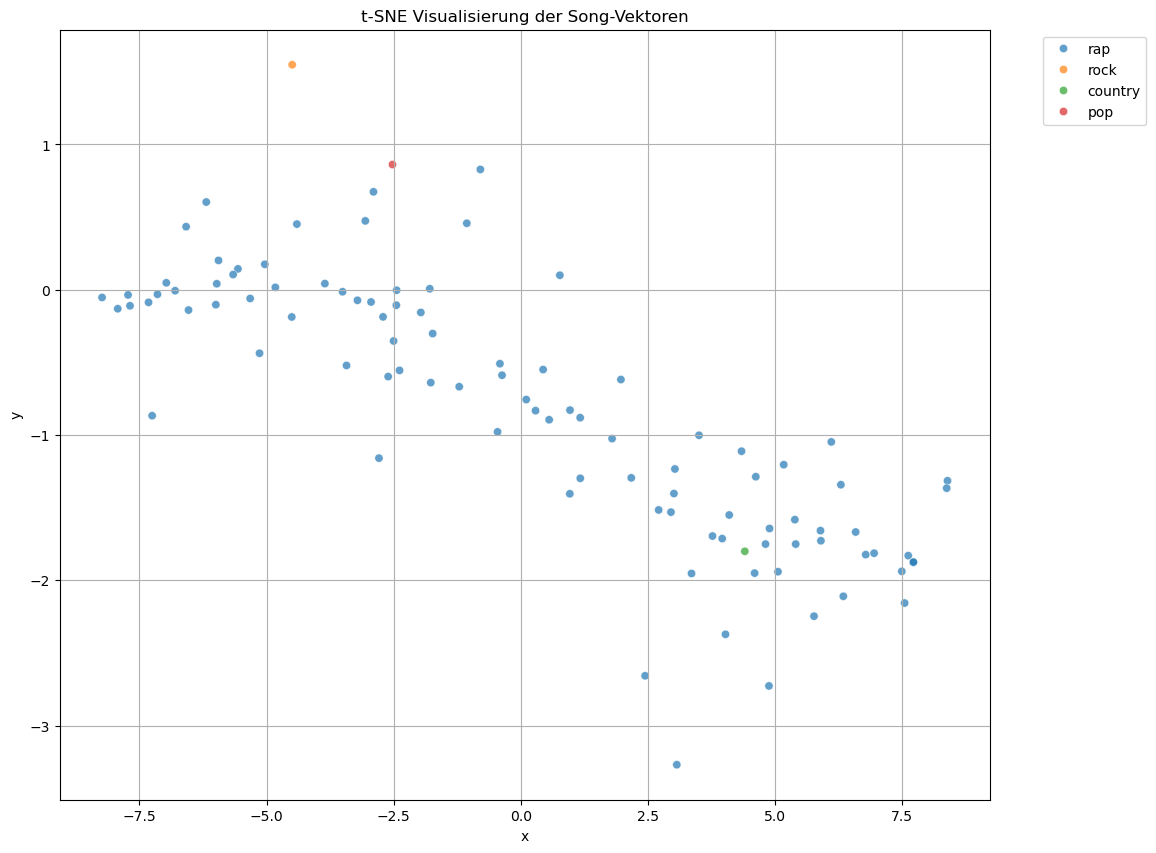

In [18]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(song_vectors)-1))
song_vectors_2d = tsne.fit_transform(song_vectors)

songs_df = pd.DataFrame({
    'x': song_vectors_2d[:, 0],
    'y': song_vectors_2d[:, 1],
    'title': english_sample.iloc[valid_indices]['title'].values,
    'artist': english_sample.iloc[valid_indices]['artist'].values,
    'tag': english_sample.iloc[valid_indices]['tag'].values
})

plt.figure(figsize=(12, 10))
sns.scatterplot(data=songs_df, x='x', y='y', hue='tag', palette='tab10', alpha=0.7)
plt.title('t-SNE Visualisierung der Song-Vektoren')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [20]:
from sklearn.preprocessing import normalize

normalized_vectors = normalize(song_vectors)
cosine_sim = cosine_similarity(normalized_vectors)

for i in range(min(5, len(valid_indices))):
    idx = valid_indices[i]
    song = english_sample.iloc[idx]
    sim_scores = sorted(list(enumerate(cosine_sim[i])), key=lambda x: x[1], reverse=True)[1:6]
    print(f"\nTop 5 ähnlichste Songs zu '{song['title']}' von {song['artist']}:")
    for j, score in sim_scores:
        similar_song = english_sample.iloc[valid_indices[j]]
        print(f"  '{similar_song['title']}' von {similar_song['artist']} (Ähnlichkeit: {score:.4f})")


Top 5 ähnlichste Songs zu 'Watch Roger Do His Thing' von Main Source:
  'Next Level' von Showbiz & A.G. (Ähnlichkeit: 0.9998)
  'Freaky Behavior' von 2 Live Crew (Ähnlichkeit: 0.9997)
  'She Said' von Mac Miller (Ähnlichkeit: 0.9997)
  'Fat Raps' von King Chip (Ähnlichkeit: 0.9997)
  'Depend on Me' von Mr. Magic (Ähnlichkeit: 0.9997)

Top 5 ähnlichste Songs zu 'Things Got Wild' von U.N.L.V.:
  'Headaches and Woes' von Aceyalone (Ähnlichkeit: 0.9997)
  'Astro' von Kubus (Ähnlichkeit: 0.9996)
  'Daddys Lambo' von Yelawolf (Ähnlichkeit: 0.9996)
  'Relaxation' von Fashawn (Ähnlichkeit: 0.9996)
  'Daddys Home' von Big Daddy Kane (Ähnlichkeit: 0.9996)

Top 5 ähnlichste Songs zu 'Get High to This' von Lil Wyte:
  'Overdose' von Omen (Producer) (Ähnlichkeit: 0.9999)
  'Next Level' von Showbiz & A.G. (Ähnlichkeit: 0.9999)
  'Freaky Behavior' von 2 Live Crew (Ähnlichkeit: 0.9999)
  'Hypnotic' von Syleena Johnson (Ähnlichkeit: 0.9998)
  'Take a Hike One' von Lost Boyz (Ähnlichkeit: 0.9998)

Top 